# 다항 분포 (multinomial Distribution)

카테고리 분포를 여러 번 시도하여 얻은 원소의 성공횟수 값

$$ \text{Mu}(x;N,\theta) $$

(수식)

$$ \text{Mu}(x;N,\theta) = \binom N x  \prod_{k=1}^K \theta_k^{x_k} = \binom N {x_1, \cdots, x_K} \prod_{k=1}^K \theta_k^{x_k} $$

(참고)
$$ \binom N {x_1, \cdots, x_K} = \dfrac{N!}{x_1! \cdots x_K!} $$

## 다항 분포의 모멘트

#### 기대값

$$\text{E}[x_k] = N\theta_k$$

#### 분산

$$\text{Var}[x_k] = N\theta_k(1-\theta_k)$$

## 다항 분포 구하기

In [4]:
# 마찬가지로 주사위
np.random.seed(0)
N = 30 # 횟수 30번 시행을 1세트로
theta = np.array([0, 0, 0.1, 0.2, 0.3, 0.4]) # 확률 부여
X = np.random.multinomial(N, theta, size=100) #1 세트 100회 반복 = 총3000번
X[:5] #앞 5개만 추출

array([[ 0,  0,  3,  6,  9, 12],
       [ 0,  0,  5,  9,  6, 10],
       [ 0,  0,  3,  9,  5, 13],
       [ 0,  0,  5,  7, 10,  8],
       [ 0,  0,  3,  8,  6, 13]])

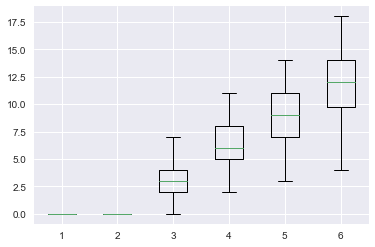

In [7]:
# boxplot
# 표본, 데이터가 많을 때, 점으로 일일이 찍지 못 할 때 씀
plt.boxplot(X)
plt.show()

Boxplot의 경우, Quartile로 표현이 되며, 수염 밖의 값은 outlier이다.

In [8]:
df = pd.DataFrame(X).stack().reset_index()
df.columns = ["trial", "class", "binomial"]
df.head()

,trial,class,binomial
0,0,0,0
1,0,1,0
2,0,2,3
3,0,3,6
4,0,4,9


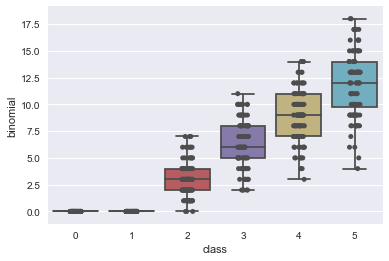

In [10]:
# Boxplot in seaborn
sns.boxplot(x="class", y="binomial", data=df)
sns.stripplot(x="class", y="binomial", data=df, jitter=True, color=".3")
plt.show() 

# jitter = True는 같은 위치의 데이터를 랜덤으로 흔들리게 해서 표시하게끔

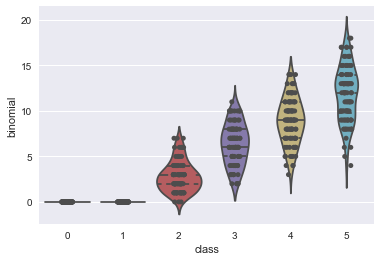

In [11]:
# Violin plot in seaborn
sns.violinplot(x="class", y="binomial", data=df, inner="quartile")
sns.stripplot(x="class", y="binomial", data=df, jitter=True, color=".3")
plt.show()